# <font face="Arial"> System Overview
This code is developed based on the Tkinter library of Python to create a graphical user interface (GUI) application. It is used for comprehensive analysis of the iris dataset, covering functions such as data loading, preprocessing, exploratory data analysis (EDA), supervised learning modeling (random forest classifier), and unsupervised learning clustering (K-means algorithm). The system uses visual charts and indicators to present the analysis results in an intuitive manner. It also supports user-defined parameters and has strong interactivity.

# <font face="Arial">Core library
Data processing: numpy (numerical computing), pandas (data manipulation).
Visualization: matplotlib (basic plotting), seaborn (statistical visualization).

Machine learning:
Preprocessing: StandardScaler (standardization), LabelEncoder (label encoding).

Models: RandomForestClassifier (random forest classifier), KMeans (K-means clustering).

Tools: GridSearchCV (grid search for parameter tuning), PCA (principal component analysis).

GUI framework: tkinter (basic interface), ttk (theme-based components).

Others: warnings (ignore warnings), messagebox (message prompts)

# <font face="Arial">Dataset description
Using the classic Iris dataset, which contains 150 samples, divided into 3 categories (Spectral Iris, Varying Iris, and Virginia Iris) (50 samples in each category), with 4 continuous numerical features (sepal length, sepal width, petal length, petal width). 

In the code, the data is loaded through the UCI official website link, and the category text is converted to numerical values (0, 1, 2) through label encoding. The feature scales are standardized, and the training set and test set are divided in a 7:3 ratio.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

# Load data
def load_data():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    columns = ['Length of the calyx', 'The width of the calyx', 'Petal length', 'Petal width', 'Category']
    df = pd.read_csv(url, names=columns)
    return df

# Data preprocessing
def preprocess_data(df, test_size=0.3, random_state=42):
    le = LabelEncoder()
    df['Category'] = le.fit_transform(df['Category'])
    scaler = StandardScaler()
    X = df.drop('Category', axis=1)
    y = df['Category']
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test, le, scaler

# Load data
df = load_data()
X_train, X_test, y_train, y_test, le, scaler = preprocess_data(df)

# The first few rows of data in the dataset


The previous several rows of data：
  sepal_length sepal_width petal_length petal_width      species
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


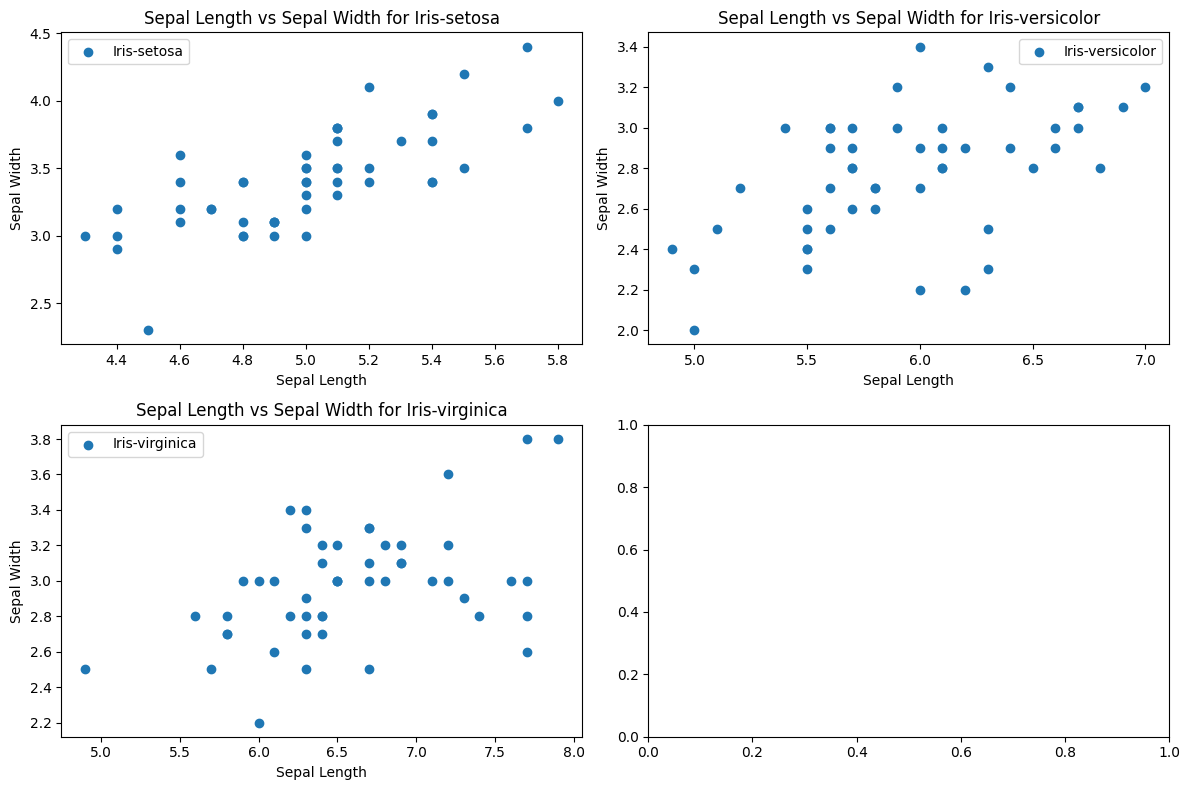

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'iris data.xlsx'  
df = pd.read_excel(file_path, header=None)  

df = df[0].str.split(',', expand=True)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
print("\nThe previous several rows of data：")
print(df.head())

grouped = df.groupby('species')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for (name, group), ax in zip(grouped, axes):
    ax.scatter(group['sepal_length'].astype(float), group['sepal_width'].astype(float), label=name)
    ax.set_title(f'Sepal Length vs Sepal Width for {name}')
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')
    ax.legend()

plt.tight_layout()
plt.show()

# The number of datasets

In [2]:
num_rows, num_columns = df.shape
print(f"\nTotal data quantity：{num_rows} rows x {num_columns} columns = {num_rows * num_columns} data points")


Total data quantity：150 rows x 5 columns = 750 data points


# Are there any missing values?

In [4]:
missing_values_count = df.isnull().sum()
print("\nThe number of null values in each column：")
print(missing_values_count)

has_missing_values = df.isnull().any().any()
print("\nAre there any null values in the dataset?：", has_missing_values)


The number of null values in each column：
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Are there any null values in the dataset?： False


# <font face="Arial">Chart Interpretation
On the diagonal: These are the kernel density estimation graphs for each feature. The kernel density graph of "The width of the calyx" shows a single-peak shape, indicating that the values of this feature are relatively concentrated within a certain range. Through these graphs, we can intuitively understand the distribution pattern of each feature and determine whether it conforms to a normal distribution, etc.

On the non-diagonal: These are scatter plots of two different features. For example, the scatter plot corresponding to "The width of the calyx" and "Petal length" allows us to observe whether there is some linear or non-linear relationship between these two features. From the graph, we can see the distribution of the points. If the points show a certain trend, it indicates that there may be a positive correlation between these two features; if they are concentrated from the upper left to the lower right, it may indicate a negative correlation. This feature relationship matrix graph can help us quickly and comprehensively understand the distribution and interrelationships of each feature.

<Figure size 1000x800 with 0 Axes>

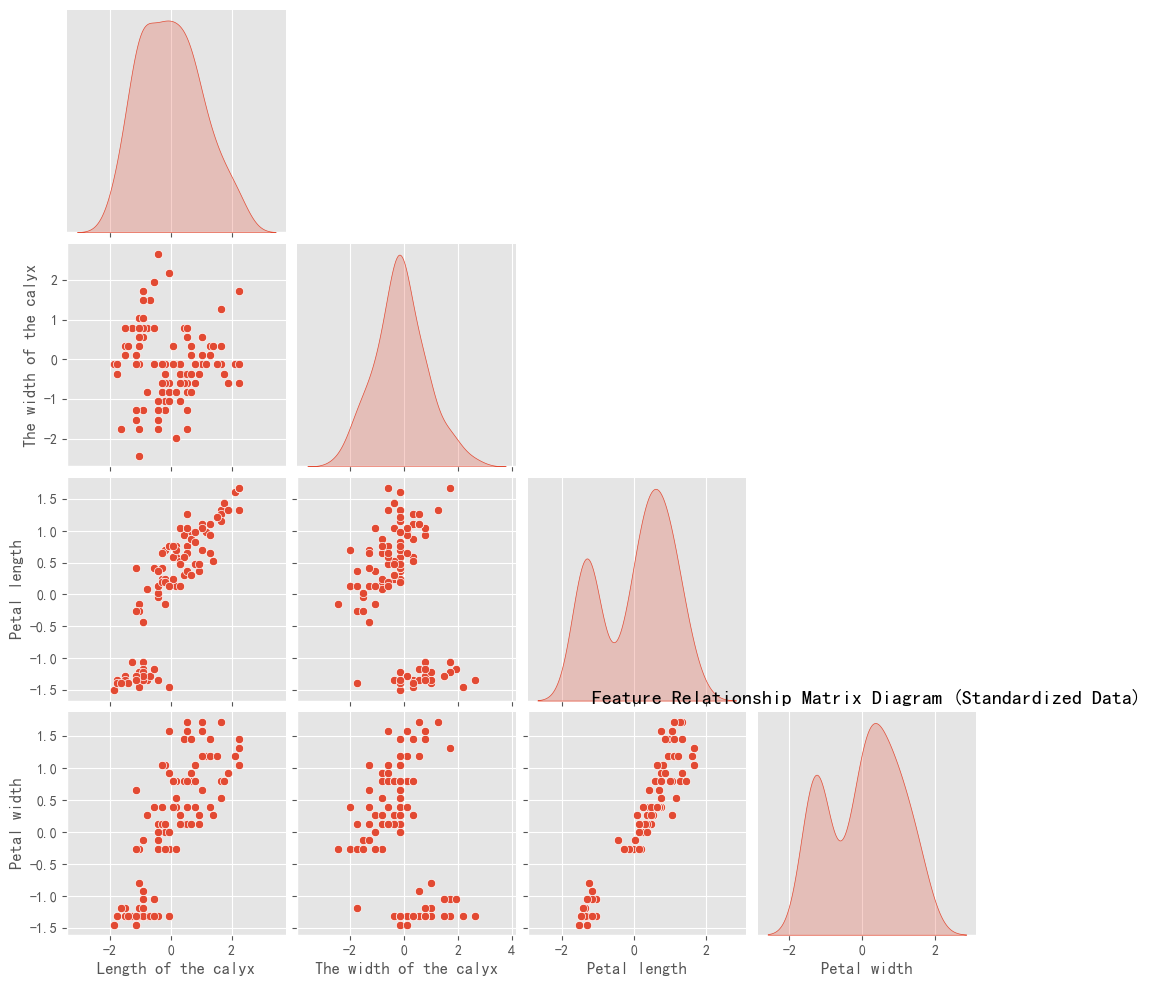

In [3]:
# Feature Relationship Matrix Diagram
plt.figure(figsize=(10, 8))
sns.pairplot(pd.DataFrame(X_train, columns=df.columns[:-1]), diag_kind='kde', corner=True)
plt.title('Feature Relationship Matrix Diagram (Standardized Data)')
plt.show()

# <font face="Arial">Heatmap Interpretation
The values on the main diagonal are all 1 because the correlation between a feature and itself is necessarily a perfect positive correlation (with a correlation coefficient of 1). For example, the correlation coefficient between "Length of the calyx" and itself is 1.00.

Positive Correlation: The correlation coefficient between "Length of the calyx" and "Petal length" is 0.87, and the correlation coefficient between "Petal length" and "Petal width" is as high as 0.96. These larger positive values indicate a strong positive correlation between them, meaning that when one feature value increases, the other feature value tends to increase as well.

Negative Correlation: The correlation coefficient between "The width of the calyx" and "Petal length" is -0.33, and the correlation coefficient between "The width of the calyx" and "Petal width" is -0.25. This indicates a certain degree of negative correlation between the width of the calyx and the length and width of the petals, meaning that as the width of the calyx increases, the length and width of the petals may decrease.

Color and Values: The shade of the color directly reflects the magnitude of the correlation coefficient. The closer the color is to red, the stronger the positive correlation; the closer the color is to blue, the stronger the negative correlation. By combining the values in the cells, one can more accurately determine the strength and direction of the correlation between features. Through this heatmap, one can quickly understand the linear correlation relationships among the features in the iris dataset.

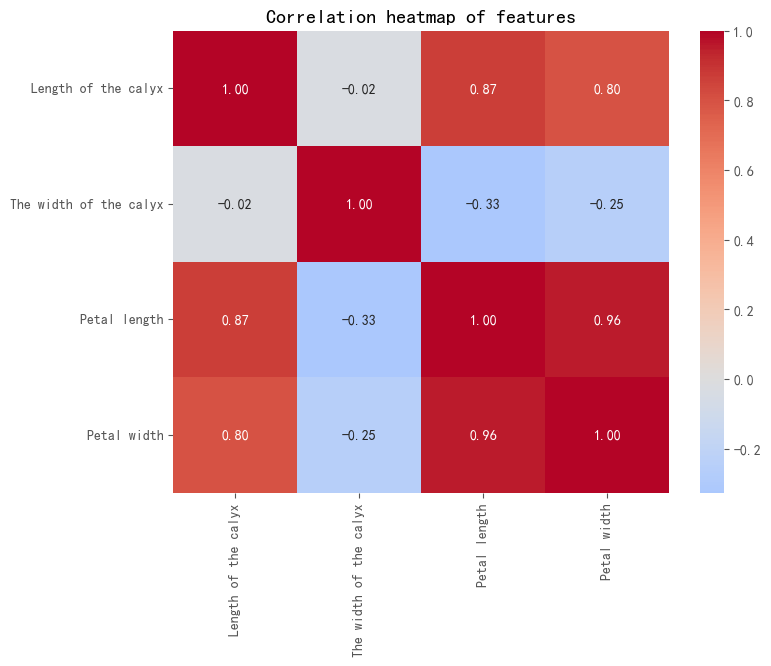

In [13]:
#Correlation heatmap of features
plt.figure(figsize=(8, 6))
corr_matrix = pd.DataFrame(X_train, columns=df.columns[:-1]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation heatmap of features')
plt.show()

# <font face="Arial">PCA Dimensionality Reduction
Principal Component Explains Variance: From the horizontal and vertical coordinate labels, it can be seen that the first principal component explains 71.19% of the variance, and the second principal component explains 23.89% of the variance. These two principal components together explain the majority (close to 95%) of the data variance, indicating that through these two principal components, the main information of the original data can be retained.

Category Distribution: The points of different colors represent different categories. It can be seen that the points of different categories have certain distribution patterns in the principal component space. For example, the purple points, cyan points, and yellow points are respectively clustered in different areas, indicating that after PCA dimensionality reduction, the data of different categories can be well separated in the new feature space, which to some extent reflects the effectiveness of PCA dimensionality reduction in visualization and data feature extraction.

This graph helps us intuitively understand the effect of PCA dimensionality reduction and the distribution of different categories in the low-dimensional space.

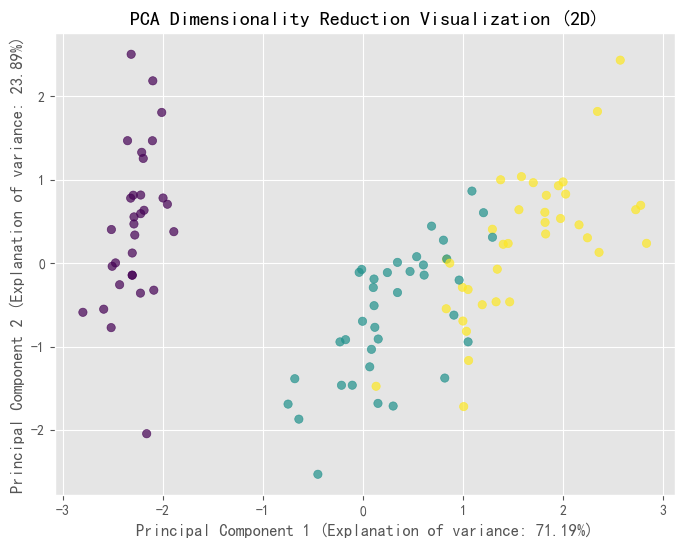

In [5]:
# PCA Dimensionality Reduction Visualization
plt.figure(figsize=(8, 6))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1 (Explanation of variance: {:.2f}%)'.format(pca.explained_variance_ratio_[0] * 100))
plt.ylabel('Principal Component 2 (Explanation of variance: {:.2f}%)'.format(pca.explained_variance_ratio_[1] * 100))
plt.title('PCA Dimensionality Reduction Visualization (2D)')
plt.show()

# Interpretation of the Elbow Rule Chart
Horizontal axis: Represents the number of clusters, ranging from 1 to 10, reflecting different clustering assumptions.

Vertical axis: Represents the Within-Cluster Sum of Squares (WCSS), with larger values indicating a greater sum of the squared distances of the sample points from their respective cluster centers, meaning a poorer degree of clustering compactness.

Trend: As the number of clusters increases, the overall WCSS shows a downward trend. This is because the more clusters there are, the fewer samples each cluster contains, and the smaller the distances between the sample points and their respective cluster centers become. Consequently, WCSS naturally decreases.

Elbow Rule: Observe the shape of the chart. When the number of clusters is small, the decrease in WCSS is significant; when the number of clusters reaches a certain value, the decrease in WCSS slows down significantly. In this chart, when the number of clusters is 2, the curve shows a clear turning point, similar to a person's elbow. Therefore, according to the elbow rule, the most appropriate number of clusters for this dataset might be 2. However, for the Iris dataset, it is generally known that it has 3 categories. Here, it can also be used as a method to verify and analyze the clustering effect.

  File "C:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\xx\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


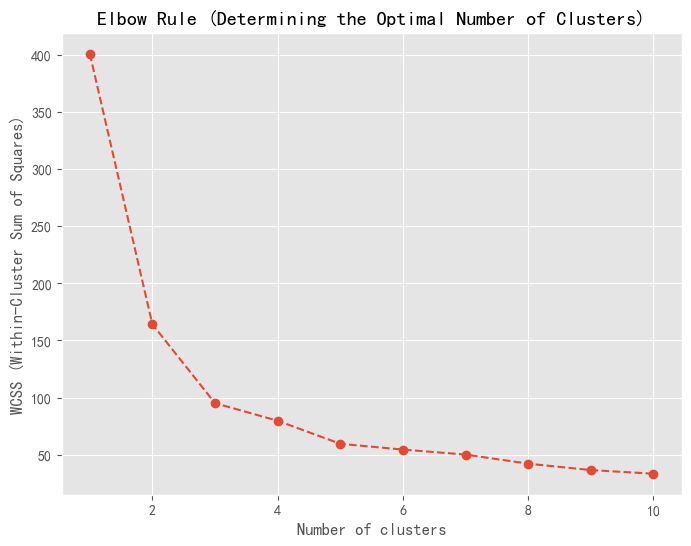

In [6]:
# Elbow Rule Diagram
plt.figure(figsize=(8, 6))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Rule (Determining the Optimal Number of Clusters)')
plt.show()

# Interpretation of the confusion matrix
Matrix structure: This confusion matrix is a 3×3 square matrix because the Iris dataset has 3 categories (Iris-setosa, Iris-versicolor, Iris-virginica).

The rows represent the true categories, from top to bottom they are Iris-setosa, Iris-versicolor, Iris-virginica.

The columns represent the predicted categories, from left to right they are Iris-setosa, Iris-versicolor, Iris-virginica.

The numerical meaning: For the Iris-setosa category, among the samples whose true category is Iris-setosa, 19 were correctly predicted as Iris-setosa and none were misclassified as other categories (the corresponding cell value is 0). This indicates that the model performed very well in identifying the Iris-setosa category.

For the Iris-versicolor category, among the samples whose true category is Iris-versicolor, 13 were correctly predicted as Iris-versicolor and none were misclassified as Iris-setosa or Iris-virginica (the corresponding cell value is 0).

For the Iris-virginica category, among the samples whose true category is Iris-virginica, 13 were correctly predicted as Iris-virginica and none were misclassified as other categories (the corresponding cell value is 0).

Overall assessment: From this confusion matrix, it can be seen that the model's classification effect on the Iris dataset is very ideal. No samples of any category were misclassified, that is, the model's accuracy rate reached 100%. This might be because the hyperparameter combination found through grid search is very suitable for this dataset. Through the confusion matrix, we can intuitively understand the classification performance of the model in different categories and discover possible misclassification problems.

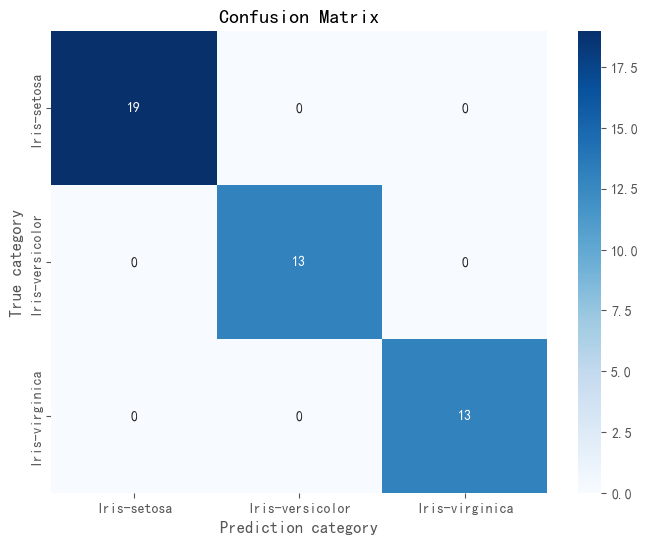

In [14]:
# Training and evaluating the model
from sklearn.model_selection import GridSearchCV  

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Prediction category')
plt.ylabel('True category')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
Horizontal axis: It shows 4 features of the iris dataset, namely Petal width, Petal length, Length of the calyx, and The width of the calyx, and they are arranged from the most important to the least important according to the feature importance.

Vertical axis: It represents the feature importance score. The higher the score, the greater the role that the feature plays in the classification of the random forest model.

Feature importance comparison: It can be clearly seen from the graph that the importance scores of Petal width and Petal length are higher, far exceeding those of Length of the calyx and The width of the calyx. This means that when using the random forest model to classify irises, the features of petal width and length provide more information that is helpful for distinguishing different iris species, while the related features of the calyx are relatively less important. By understanding the feature importance, in subsequent data analysis and modeling, one can consider whether to perform dimensionality reduction on unimportant features or further explore the intrinsic relationship between important features and categories.

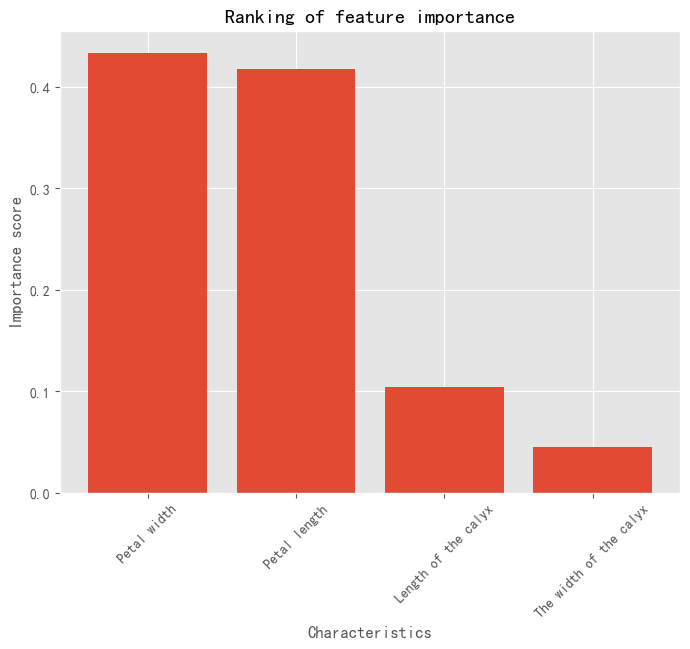

In [8]:
# Feature importance
plt.figure(figsize=(8, 6))
importances = best_model.feature_importances_
features = df.columns[:-1]
indices = np.argsort(importances)[::-1]
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45)
plt.xlabel('Characteristics')
plt.ylabel('Importance score')
plt.title('Ranking of feature importance')
plt.show()

# Multi-category interpretation
Axes:
Horizontal axis: Represents the false positive rate, which is the proportion of true negative examples that are wrongly predicted as positive examples.
Vertical axis: Represents the true positive rate, which is the proportion of true positive examples that are correctly predicted as positive examples.

Curve meaning:

The red curves in the figure correspond to different categories of the iris dataset (Iris-setosa, Iris-versicolor, Iris-virginica). Each curve shows the relationship between the true positive rate and false positive rate of the prediction for that category at different classification thresholds.

The black dotted line represents the random guessing line (AUC = 0.5), which indicates the performance of the model when it is completely randomly classified.

AUC value: As can be seen from the figure, the area under the curve (AUC) for each category is 1.00. AUC is an important indicator for evaluating the performance of a classification model, with a value ranging from 0 to 1. The closer the value is to 1, the better the model's performance. An AUC of 1 means that the model has perfect performance in distinguishing this category from other categories and can accurately distinguish between positive and negative examples. In this multi-category ROC curve of the iris dataset, the AUC for all categories is 1, indicating that the model performs extremely well in the classification task and can well distinguish different types of irises. Through the multi-category ROC curve, the classification performance of the model in each category can be intuitively evaluated, and potential issues such as class imbalance or the model's insufficient ability to distinguish certain categories can be identified.

<Figure size 800x600 with 0 Axes>

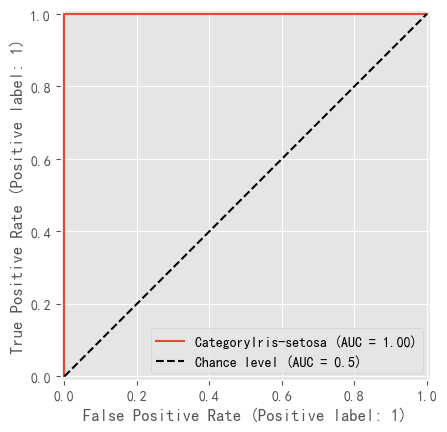

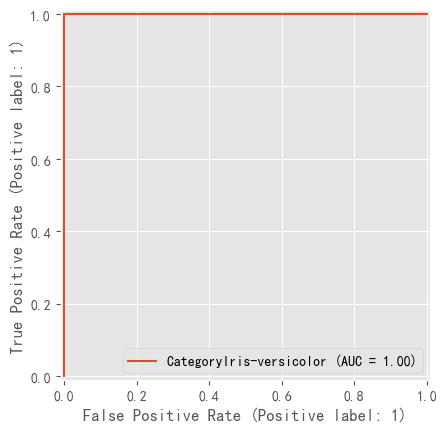

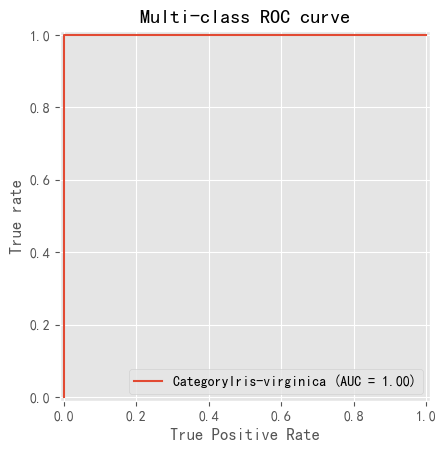

In [15]:
# Multi-class ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(le.classes_)):
    RocCurveDisplay.from_predictions(
        y_test == i,
        y_prob[:, i],
        name=f"Category{le.classes_[i]}",
        plot_chance_level=(i == 0)
    )
plt.xlabel('True Positive Rate')
plt.ylabel('True rate')
plt.title('Multi-class ROC curve')
plt.legend(loc="lower right")
plt.show()

# Cluster Analysis
Axes: The horizontal axis is "Principal Component 1", and the vertical axis is "Principal Component 2", representing the two principal components of the data after PCA dimensionality reduction.

Sample points: Points of different colors represent samples of different clusters. It can be seen that the sample points are roughly distributed around their respective cluster centers, indicating that the K-means clustering algorithm successfully divided the data into different clusters.

Cluster centers: The red "X" marks represent the cluster centers. There are 3 cluster centers in the figure, which is consistent with the set number of clusters n_clusters = 3. The cluster centers are the representative positions of each cluster and reflect the average characteristics of the samples within the cluster. By observing the distribution relationship between the sample points and the cluster centers, the clustering effect can be evaluated. If the sample points are closely around the cluster centers, it indicates a good clustering effect; conversely, if the sample points are distributed relatively scattered, it may indicate a poor clustering effect, and the clustering parameters need to be adjusted or other clustering methods considered. This figure intuitively shows the clustering results of K-means clustering on the data after PCA dimensionality reduction, helping to understand the clustering structure of the data in the low-dimensional space.

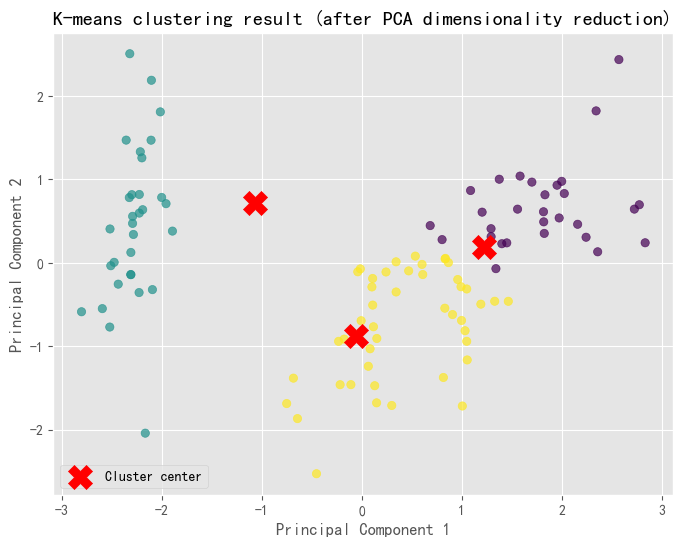

In [16]:
# Cluster analysis
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_train)

# Visualization of clustering results
plt.figure(figsize=(8, 6))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Cluster center')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means clustering result (after PCA dimensionality reduction)')
plt.legend()
plt.show()

# Chart Interpretation
Axis: The horizontal axis represents "Principal Component 1", and the vertical axis represents "Principal Component 2", representing the two principal components of the data after PCA dimensionality reduction. Through these two principal components, the original high-dimensional iris data is mapped onto a two-dimensional plane for display.

Sample Point Distribution: Points of different colors represent different real categories. From the graph, it can be seen that the points of different colors have their respective relatively concentrated distribution areas in the principal component space, indicating that different types of iris flowers have certain separability in the feature space after PCA dimensionality reduction. For example, some color points are mainly concentrated in the left area of the graph, while other color points are distributed in the right or middle areas. This distribution pattern can help us understand the positional relationship of different categories in the feature space and the degree of their differences. By comparing with the K - means clustering result graph, the effect of the clustering algorithm can be evaluated to see if the clusters obtained are consistent with the distribution of real categories, thereby judging the accuracy and rationality of the clustering.

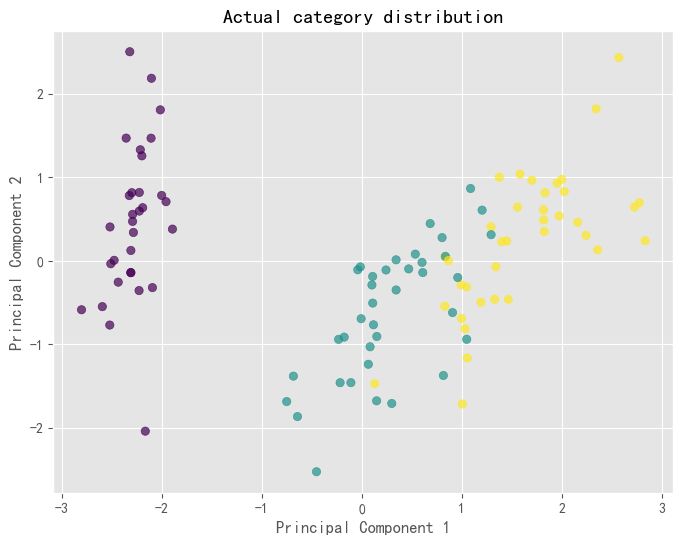

In [17]:
# Clustering and comparison with the true categories
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Actual category distribution')
plt.show()